In [1]:
from skimage import io
import numpy as np
from imageio import volread,volwrite
import matplotlib.pyplot as plt

segmentation = io.imread('data/cellpose_segmentation/40kV_DR_reslice_180deg_ROI_8bits_z300z550_cp_masks.tif')
sz = segmentation.shape
print(sz)

(251, 650, 1414)


In [2]:
unique_elements,counts_elements = np.unique(segmentation,return_counts=True)

In [3]:
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[        0         1         2 ...     50772     50773     50774]
 [160871542        32        75 ...       260       165        50]]


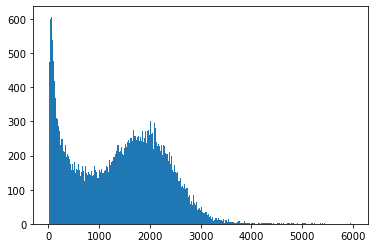

In [4]:
counts_elementstemp=counts_elements
plt.hist(counts_elementstemp, bins=500,range=[1, 6000])
plt.show()

In [5]:
toolarge = np.where(counts_elements > 5000)
toosmall = np.where(counts_elements < 500)
#900 is equivalent to a 6pixel radius
np.size(toolarge)
toolarge

(array([    0,  2717,  3569,  4664,  7244,  7306,  8227,  8965, 11360,
        11518, 20788, 21298, 22292, 22505, 23348, 23603, 25086, 26878,
        28644, 31109, 31240, 34898, 35818, 36036, 37533, 38343, 38517,
        39271, 40424, 41094, 41689, 42486, 42799, 43041, 43700, 43969,
        44031, 44785, 44960, 48716]),)

In [8]:
all_discarded = np.concatenate((toosmall, toolarge), axis=1)
#Slow
# for idx in np.nditer(toolarge):
#     seg=np.where(seg==idx,0,seg) 
#     print(idx)
#Fast
# seg_test = np.where(~np.isin(seg, toosmall), seg,0)
# seg_test_2 = np.where(~np.isin(seg, toolarge), seg_test,0)

#Faster
seg_cutOff = np.where(~np.isin(segmentation, all_discarded), seg,0)

MemoryError: Unable to allocate 1.72 GiB for an array with shape (230694100,) and data type int64

In [ ]:
unique_elements,counts_elements = np.unique(seg_cutOff,return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
plt.hist(counts_elements, bins=500,range=[1, 10000])
plt.show()

In [258]:
from imageio import volread,volwrite
volwrite('40kV_DR_reslice_180deg_ROI_8bits_z300z550_cp_masks_cutOff.tif', seg_cutOff)

In [7]:
all_discarded = np.concatenate((toosmall, toolarge), axis=1)



In [ ]:
print(np.where(np.isin(segmentation, all_discarded), seg,0))

In [ ]:
print(np.where(~np.isin(segmentation, all_discarded), seg,0))